# IMDB Movie Ratings Prediction

## Table of Contents 

<a href='#1'>  1. Importing Libraries </a> <br>
<a href='#2'>  2. Data Inspection </a> <br>
<a href='#3'>  3. Data Cleaning and EDA </a> <br>
<a href='#4'>  4. Analysis and Visualisation </a> <br>
<a href='#5'>  5. Modeling </a> <br>
<a href='#6'>  6. Inference & Further Steps </a> <br>


## Importing Libraries <a id='1'></a>

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDClassifier, LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
# ignoring warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# setting up pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:.2f}'.format


#### Reading csv file

In [4]:
# path to the data file
file_path = "./movie_review_data.csv"

# reading csv files
data = pd.read_csv(file_path)

## Data Inspection <a id='2'></a>

In [5]:
data.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0


In [6]:
data.shape

(5043, 28)

We have 5043 data points and 28 columns to start with

In [7]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

There are both categorical and numerical columns in the dataset

In [9]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.00,5028.00,4939.00,5020.00,5036.00,4159.00,5043.00,5043.00,5030.00,5022.00,4551.00,4935.00,5030.00,5043.00,4714.00,5043.00
mean,140.19,107.20,686.51,645.01,6560.05,48468407.53,83668.16,9699.06,1.37,272.77,39752620.44,2002.47,1651.75,6.44,2.22,7525.96
std,121.60,25.20,2813.33,1665.04,15020.76,68452990.44,138485.26,18163.80,2.01,377.98,206114898.45,12.47,4042.44,1.13,1.39,19320.45
min,1.00,7.00,0.00,0.00,0.00,162.00,5.00,0.00,0.00,1.00,218.00,1916.00,0.00,1.60,1.18,0.00
25%,50.00,93.00,7.00,133.00,614.00,5340987.50,8593.50,1411.00,0.00,65.00,6000000.00,1999.00,281.00,5.80,1.85,0.00
50%,110.00,103.00,49.00,371.50,988.00,25517500.00,34359.00,3090.00,1.00,156.00,20000000.00,2005.00,595.00,6.60,2.35,166.00
75%,195.00,118.00,194.50,636.00,11000.00,62309437.50,96309.00,13756.50,2.00,326.00,45000000.00,2011.00,918.00,7.20,2.35,3000.00
max,813.00,511.00,23000.00,23000.00,640000.00,760505847.00,1689764.00,656730.00,43.00,5060.00,12215500000.00,2016.00,137000.00,9.50,16.00,349000.00


## Data Cleaning and Preparation <a id='3'></a>

In [10]:
# column wise null values percentage
round(100*data.isnull().sum()/len(data),2)

color                       0.38 
director_name               2.06 
num_critic_for_reviews      0.99 
duration                    0.30 
director_facebook_likes     2.06 
actor_3_facebook_likes      0.46 
actor_2_name                0.26 
actor_1_facebook_likes      0.14 
gross                       17.53
genres                      0.00 
actor_1_name                0.14 
movie_title                 0.00 
num_voted_users             0.00 
cast_total_facebook_likes   0.00 
actor_3_name                0.46 
facenumber_in_poster        0.26 
plot_keywords               3.03 
movie_imdb_link             0.00 
num_user_for_reviews        0.42 
language                    0.24 
country                     0.10 
content_rating              6.01 
budget                      9.76 
title_year                  2.14 
actor_2_facebook_likes      0.26 
imdb_score                  0.00 
aspect_ratio                6.52 
movie_facebook_likes        0.00 
dtype: float64

We can see that there are lot of columns that has null values in them

In [11]:
# row-wise Null count the same way. 
data.isnull().sum(axis=1)

0       0 
1       0 
2       0 
3       0 
4       14
5       0 
6       0 
7       0 
8       0 
9       0 
10      0 
11      0 
12      0 
13      0 
14      0 
15      0 
16      0 
17      0 
18      0 
19      0 
20      0 
21      0 
22      0 
23      0 
24      0 
25      0 
26      0 
27      0 
28      0 
29      0 
30      0 
31      0 
32      0 
33      0 
34      0 
35      0 
36      0 
37      0 
38      0 
39      0 
40      0 
41      0 
42      0 
43      0 
44      0 
45      0 
46      0 
47      0 
48      0 
49      0 
50      0 
51      0 
52      0 
53      0 
54      0 
55      1 
56      0 
57      0 
58      0 
59      0 
60      0 
61      0 
62      0 
63      0 
64      0 
65      0 
66      0 
67      0 
68      0 
69      0 
70      0 
71      0 
72      0 
73      0 
74      0 
75      0 
76      0 
77      0 
78      0 
79      0 
80      0 
81      0 
82      0 
83      0 
84      3 
85      0 
86      0 
87      0 
88      0 
89      0 
90      0 

In [12]:
# removing imdb link and movie_title as it is of no use to us as of now

data = data.drop(columns = ['movie_imdb_link', 'movie_title'])
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,994.00,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.00,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000
4,NaN,Doug Walker,nan,nan,131.00,nan,Rob Walker,131.00,nan,Documentary,Doug Walker,8,143,NaN,0.00,NaN,nan,NaN,NaN,NaN,nan,nan,12.00,7.10,nan,0


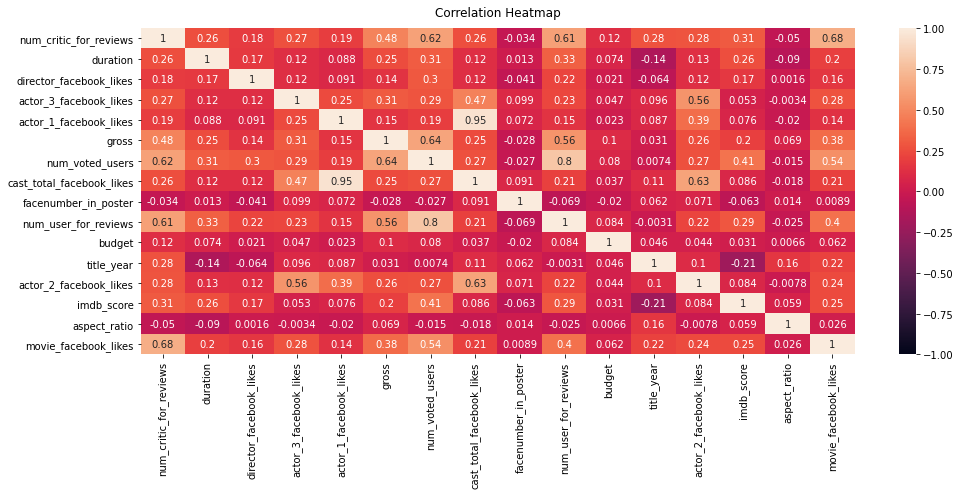

In [13]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

1. cast_total_facebook_likes is highly correlated with actor_1_facebook_likes
2. num_critic_for_reviews, num_voted_users and duration are the variables that affect the imdb score most . More the value of this variables, more will be IMDB_score

Inspecting some of the columns to handle null values

In [14]:
# checking for color column
data.color.value_counts()

Color               4815
 Black and White    209 
Name: color, dtype: int64

In [15]:
data['color'].isnull().sum()

19

In [16]:
#Since most of the movies are colored , we can impute the null in this column by Color

data.loc[pd.isnull(data['color']), ['color']] = 'Color'
data['color'].isnull().sum()
                                

0

In [17]:
# Inspect the language column of the dataset
data['language'].describe()

count     5031   
unique    47     
top       English
freq      4704   
Name: language, dtype: object

In [18]:
# Fill the NaN values with 'English' since most of the movies are in the English language
data.loc[pd.isnull(data['language']), ['language']] = 'English'
data['language'].isnull().sum()

0

In [19]:
# lets analyse columns that has null values
data['gross'].describe()

count   4159.00     
mean    48468407.53 
std     68452990.44 
min     162.00      
25%     5340987.50  
50%     25517500.00 
75%     62309437.50 
max     760505847.00
Name: gross, dtype: float64

In [20]:
data['content_rating'].value_counts()

R            2118
PG-13        1461
PG           701 
Not Rated    116 
G            112 
Unrated      62  
Approved     55  
TV-14        30  
TV-MA        20  
X            13  
TV-PG        13  
TV-G         10  
Passed       9   
NC-17        7   
GP           6   
M            5   
TV-Y7        1   
TV-Y         1   
Name: content_rating, dtype: int64

In [21]:
data['content_rating'].isnull().sum()

303

We can't impute null values in this columns, hence we will drop rows containing null values for this column

In [22]:
# Since 'gross', 'budget', 'content_rating' and 'aspect_ratio' columns have large number of NaN values, and we can't find a suitable strategy to impute values for this columns, we will drop all the rows with NaNs at this column using the
# 'isnan' and 'isnull' function of NumPy alongwith a negation '~'

data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]
data = data[~data['content_rating'].isnull()]
data = data[~np.isnan(data['aspect_ratio'])]
data.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0


In [23]:
data.shape

(3784, 26)

In [24]:
data.isnull().sum()

color                        0 
director_name                0 
num_critic_for_reviews       1 
duration                     0 
director_facebook_likes      0 
actor_3_facebook_likes       5 
actor_2_name                 1 
actor_1_facebook_likes       0 
gross                        0 
genres                       0 
actor_1_name                 0 
num_voted_users              0 
cast_total_facebook_likes    0 
actor_3_name                 5 
facenumber_in_poster         6 
plot_keywords                15
num_user_for_reviews         0 
language                     0 
country                      0 
content_rating               0 
budget                       0 
title_year                   0 
actor_2_facebook_likes       1 
imdb_score                   0 
aspect_ratio                 0 
movie_facebook_likes         0 
dtype: int64

In [25]:
# dropping the remaining null values from the dataset
data = data.dropna()

In [26]:
data.isnull().any()

color                        False
director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes       False
gross                        False
genres                       False
actor_1_name                 False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes         False
dtype: bool

In [27]:
data.shape

(3758, 26)

In [28]:
# getting the percentage of rows retained
round(100*(len(data)/5043),2)

74.52

We have retained around 75 % of data.

## Derive New Features

In [29]:
# extracting the new column which is Profit , defined as the difference b/w gross and budget
data['Profit']= data['gross']- data['budget']
data['Profit'].describe()

count   3758.00        
mean    6368699.75     
std     229858019.37   
min     -12213298588.00
25%     -10498250.50   
50%     1575480.00     
75%     25901033.25    
max     523505847.00   
Name: Profit, dtype: float64

## Analysis and Visualization <a id='4'></a>

In [30]:
# Finding the best directors

dir_df = data.pivot_table(values = 'imdb_score', index = 'director_name', aggfunc = 'mean')
dir_df = dir_df.sort_values(by = 'imdb_score', ascending = False)
dir_df = dir_df.iloc[:10, ]
dir_df

,imdb_score
director_name,
Akira Kurosawa,8.70
Tony Kaye,8.60
Charles Chaplin,8.60
Alfred Hitchcock,8.50
Ron Fricke,8.50
Damien Chazelle,8.50
Majid Majidi,8.50
Sergio Leone,8.43
Christopher Nolan,8.43


In [31]:
type(data)

pandas.core.frame.DataFrame

In [32]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Profit'],
      dtype='object')

In [33]:
# Finding the Most popular Genres
genre_df = data.copy()
genre_df['genres'] = genre_df['genres'].str.split('|')
genre_df['genre_1'] = genre_df['genres'].apply(lambda x: x[0])
genre_df['genre_2'] = genre_df['genres'].apply(lambda x : x[1] if len(x) > 1 else x[0])
genre_df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,genre_1,genre_2
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000,523505847.00,Action,Adventure
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,"[Action, Adventure, Fantasy]",Johnny Depp,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0,9404152.00,Action,Adventure


In [34]:
# Group the dataframe using 'genre_1' as the primary column and 'genre_2' as secondary

genre_df_grouped = genre_df.groupby(['genre_1', 'genre_2'])

# Create a new dataframe TopGenre which contains the 'mean' of the gross values of each combination of genres present
# Sorted this dataframe using the 'gross' column and use index-based positioning to find out the five most popular genre combos

TopGenre = pd.DataFrame(genre_df_grouped['gross'].mean()).sort_values(by = 'gross', ascending = False)
TopGenre.iloc[:5, ]

gross
genre_1   genre_2               
Family    Sci-Fi    434949459.00
Adventure Sci-Fi    228627758.50
          Family    119916614.26
          Animation 118959697.63
Action    Adventure 111489814.54

1. Family and Sci-fi is the most common Combo found in the dataset
2. Adventure with Sci-fi, family, Animation are also popular combos in the dataset

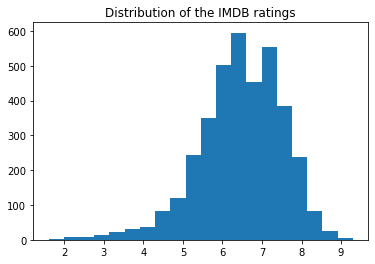

In [35]:
## Checking the distribution of IMDB Score
font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
plt.hist(data['imdb_score'], bins=20)
plt.title("Distribution of the IMDB ratings")
plt.show()

 Most of the movies have IMDB score in the range 6 to 8

(-1000.0, 300000000.0)

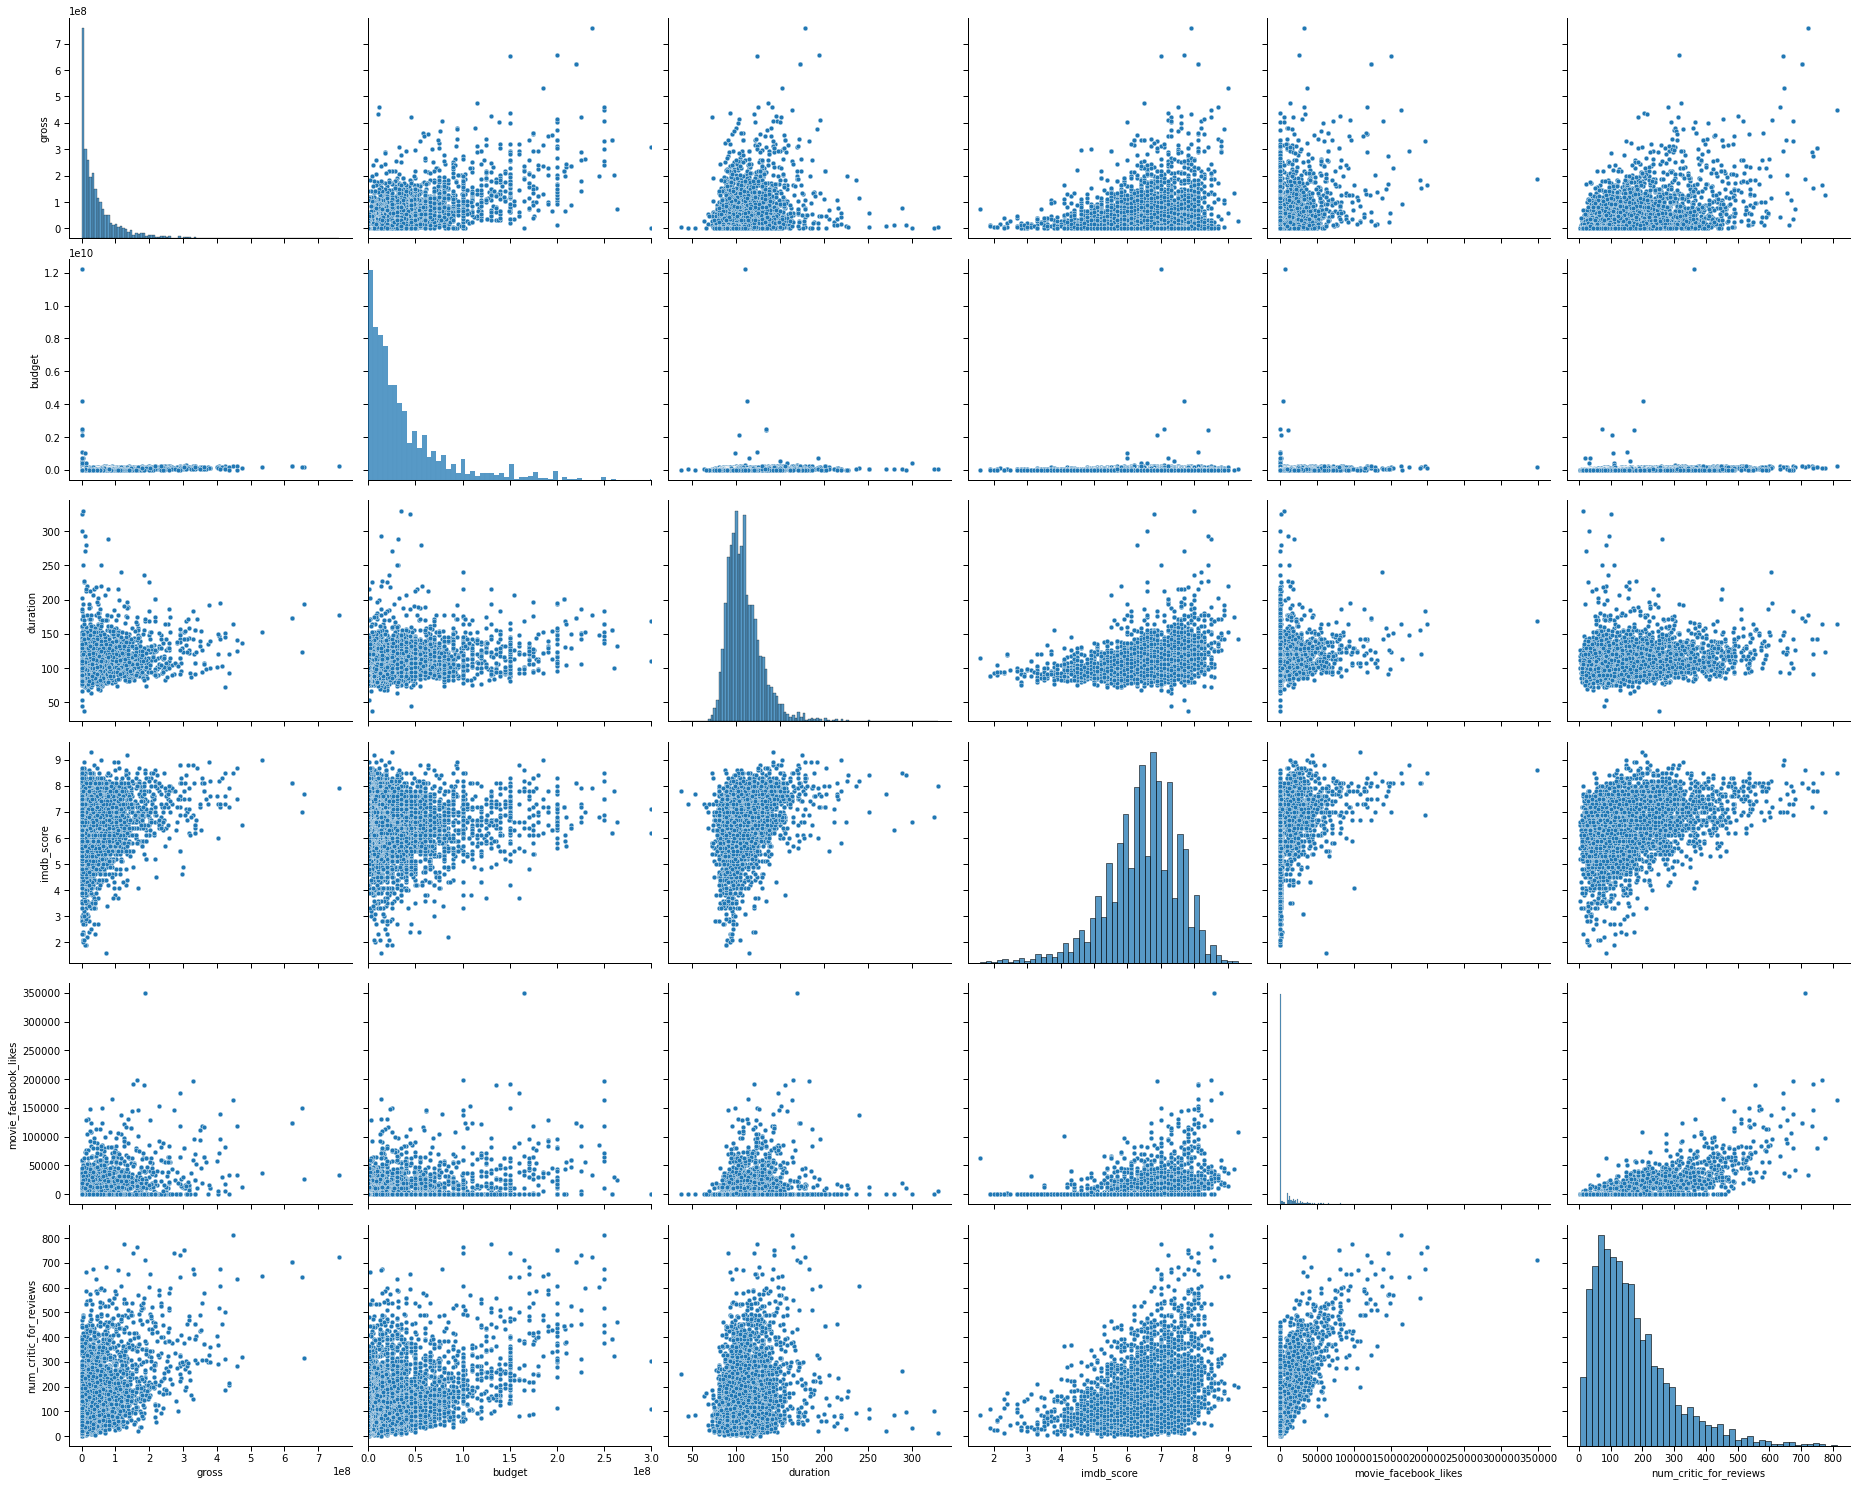

In [36]:
# select some of the columns and show their relationship
sns.set_context("paper", rc={"axes.labelsize":10, "xtick.labelsize":10, "ytick.labelsize":10})
graph = sns.pairplot(data, vars = ['gross', 'budget', 'duration', 
                           'imdb_score', 'movie_facebook_likes',
                           'num_critic_for_reviews'], height=3.5, aspect=1.25)
graph.axes[5,1].set_xlim((-1000,300000000))

Insights from the graph:
- high imdb score mostly come from low number of critic review
- user dont judge the movie based on budget
- most of the movies are around 135 minutes

# Split out special columns ("plot_keywords" & "genres")

In [37]:
# split out all values in plot_keywords column
plot_keywords = data['plot_keywords'].str.get_dummies(sep='|')
plot_keywords.head()

10 year old  1000000 b.c.  1190s  12 step program  12 year old  \
0  0            0             0      0                0             
1  0            0             0      0                0             
2  0            0             0      0                0             
3  0            0             0      0                0             
5  0            0             0      0                0             

   12 year time span  12th century  13 year old  13 year olds  13th birthday  \
0  0                  0             0            0             0               
1  0                  0             0            0             0               
2  0                  0             0            0             0               
3  0                  0             0            0             0               
5  0                  0             0            0             0               

   14 year old  14th century  1520s  15th birthday  15th century  16 year old  \
0  0            0             0      0              0             0             
1  0            0             0      0              0             0             
2  0            0             0      0              0             0             
3  0            0             0      0              0             0             
5  0            0             0      0              0             0             

   16th century  17th century  18 wheeler  1800s  1810s  1850s  1860s  1880s  \
0  0             0             0           0      0      0      0      0       
1  0             0             0           0      0      0      0      0       
2  0             0             0           0      0      0      0      0       
3  0             0             0           0      0      0      0      0       
5  0             0             0           0      0      0      0      0       

   1890s  18th birthday  18th century  1910s  1920s  1930s  1940s  1950s  \
0  0      0              0             0      0      0      0      0       
1  0      0              0             0      0      0      0      0       
2  0      0              0             0      0      0      0      0       
3  0      0              0             0      0      0      0      0       
5  0      0              0             0      0      0      0      0       

   1955 chevrolet  1959 cadillac  1960s  1969 dodge charger  1970s  1980s  \
0  0               0              0      0                   0      0       
1  0               0              0      0                   0      0       
2  0               0              0      0                   0      0       
3  0               0              0      0                   0      0       
5  0               0              0      0                   0      0       

   1988 winter olympics  1990s  19th century  1st century  20 years later  \
0  0                     0      0             0            0                
1  0                     0      0             0            0                
2  0                     0      0             0            0                
3  0                     0      0             0            0                
5  0                     0      0             0            0                

   2000s  2010s  2030s  21 year old  21st birthday  21st century  22 year old  \
0  0      0      0      0            0              0             0             
1  0      0      0      0            0              0             0             
2  0      0      0      0            0              0             0             
3  0      0      0      0            0              0             0             
5  0      0      0      0            0              0             0             

   23 year time span  23rd century  27th century  3 dimensional  30 year old  \
0  0                  0             0             0              0             
1  0                  0             0             0              0             
2  0                  0      

there are a lot of dummy columns created for this field hence we will not use them

In [38]:
# spliting out all values in genres column
genres = data['genres'].str.get_dummies(sep='|')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [39]:
data['facenumber_in_poster'].value_counts()

0.00     1584
1.00     955 
2.00     533 
3.00     294 
4.00     163 
5.00     76  
6.00     57  
8.00     32  
7.00     30  
9.00     11  
10.00    6   
11.00    5   
15.00    4   
12.00    3   
13.00    1   
31.00    1   
14.00    1   
19.00    1   
43.00    1   
Name: facenumber_in_poster, dtype: int64

In [40]:
data.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000,523505847.00
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0,9404152.00


In [41]:
data.groupby(by = 'title_year')['imdb_score'].mean()

title_year
1927.00   8.30
1929.00   6.30
1933.00   7.70
1935.00   7.80
1936.00   8.60
1937.00   7.70
1939.00   8.15
1940.00   7.50
1946.00   7.50
1947.00   7.70
1948.00   7.10
1950.00   7.00
1952.00   6.70
1953.00   6.75
1954.00   8.45
1957.00   8.20
1959.00   8.30
1960.00   8.50
1961.00   7.60
1962.00   7.85
1963.00   7.37
1964.00   7.84
1965.00   7.28
1966.00   8.90
1967.00   6.90
1968.00   7.90
1969.00   7.37
1970.00   7.00
1971.00   6.73
1972.00   7.65
1973.00   7.60
1974.00   7.53
1975.00   8.33
1976.00   7.45
1977.00   7.31
1978.00   7.02
1979.00   7.37
1980.00   6.97
1981.00   6.71
1982.00   6.78
1983.00   6.88
1984.00   6.96
1985.00   6.90
1986.00   6.36
1987.00   6.36
1988.00   6.62
1989.00   6.79
1990.00   6.87
1991.00   6.52
1992.00   6.91
1993.00   6.73
1994.00   6.62
1995.00   6.58
1996.00   6.43
1997.00   6.49
1998.00   6.52
1999.00   6.40
2000.00   6.27
2001.00   6.27
2002.00   6.28
2003.00   6.23
2004.00   6.45
2005.00   6.43
2006.00   6.39
2007.00   6.59
2008.00   6.35

There is no strong relation b/w title year and imdb_score. we will drop it as creating dummies for it will increase dimension by a large amount.

In [42]:
data['aspect_ratio'].value_counts()

2.35     1989
1.85     1591
1.37     48  
1.66     39  
1.78     34  
1.33     18  
2.39     11  
2.20     11  
2.40     3   
2.76     3   
2.00     3   
1.75     2   
2.24     1   
1.18     1   
2.55     1   
1.77     1   
16.00    1   
1.50     1   
Name: aspect_ratio, dtype: int64

In [43]:
genres_dummies_df = data['genres'].str.get_dummies(sep='|')

In [44]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Profit'],
      dtype='object')

# Drop unnecessary columns and rearrange

In [45]:
# Here I am dropping some columns before model building
# director names, actor names , title_year, plot_keywords - creating dummies will add lot of features , modeling will face curse of dimensionality
# genres- because we have already created dummies for it
data = data.drop(['director_name', 'actor_3_name', 'actor_2_name', 'actor_1_name',
                  'genres', 'plot_keywords', 'title_year'], 1)
data.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,Color,723.00,178.00,0.00,855.00,1000.00,760505847.00,886204,4834,0.00,3054.00,English,USA,PG-13,237000000.00,936.00,7.90,1.78,33000,523505847.00
1,Color,302.00,169.00,563.00,1000.00,40000.00,309404152.00,471220,48350,0.00,1238.00,English,USA,PG-13,300000000.00,5000.00,7.10,2.35,0,9404152.00
2,Color,602.00,148.00,0.00,161.00,11000.00,200074175.00,275868,11700,1.00,994.00,English,UK,PG-13,245000000.00,393.00,6.80,2.35,85000,-44925825.00
3,Color,813.00,164.00,22000.00,23000.00,27000.00,448130642.00,1144337,106759,0.00,2701.00,English,USA,PG-13,250000000.00,23000.00,8.50,2.35,164000,198130642.00
5,Color,462.00,132.00,475.00,530.00,640.00,73058679.00,212204,1873,1.00,738.00,English,USA,PG-13,263700000.00,632.00,6.60,2.35,24000,-190641321.00


In [46]:
len(data.columns)

20

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3758 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3758 non-null   object 
 1   num_critic_for_reviews     3758 non-null   float64
 2   duration                   3758 non-null   float64
 3   director_facebook_likes    3758 non-null   float64
 4   actor_3_facebook_likes     3758 non-null   float64
 5   actor_1_facebook_likes     3758 non-null   float64
 6   gross                      3758 non-null   float64
 7   num_voted_users            3758 non-null   int64  
 8   cast_total_facebook_likes  3758 non-null   int64  
 9   facenumber_in_poster       3758 non-null   float64
 10  num_user_for_reviews       3758 non-null   float64
 11  language                   3758 non-null   object 
 12  country                    3758 non-null   object 
 13  content_rating             3758 non-null   objec

In [48]:
# convert aspect_ratio to object, other wise model will assume it to be numeric
data['aspect_ratio'] = data.aspect_ratio.astype(object)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3758 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3758 non-null   object 
 1   num_critic_for_reviews     3758 non-null   float64
 2   duration                   3758 non-null   float64
 3   director_facebook_likes    3758 non-null   float64
 4   actor_3_facebook_likes     3758 non-null   float64
 5   actor_1_facebook_likes     3758 non-null   float64
 6   gross                      3758 non-null   float64
 7   num_voted_users            3758 non-null   int64  
 8   cast_total_facebook_likes  3758 non-null   int64  
 9   facenumber_in_poster       3758 non-null   float64
 10  num_user_for_reviews       3758 non-null   float64
 11  language                   3758 non-null   object 
 12  country                    3758 non-null   object 
 13  content_rating             3758 non-null   objec

In [50]:
# merge original dataframe and genres dataframe together in column axis

data_overall= pd.concat([data, genres_dummies_df], axis=1)

In [51]:
# data_overall.info()

In [52]:
# getting the numeric columns
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit
0,723.00,178.00,0.00,855.00,1000.00,760505847.00,886204,4834,0.00,3054.00,237000000.00,936.00,7.90,33000,523505847.00
1,302.00,169.00,563.00,1000.00,40000.00,309404152.00,471220,48350,0.00,1238.00,300000000.00,5000.00,7.10,0,9404152.00
2,602.00,148.00,0.00,161.00,11000.00,200074175.00,275868,11700,1.00,994.00,245000000.00,393.00,6.80,85000,-44925825.00
3,813.00,164.00,22000.00,23000.00,27000.00,448130642.00,1144337,106759,0.00,2701.00,250000000.00,23000.00,8.50,164000,198130642.00
5,462.00,132.00,475.00,530.00,640.00,73058679.00,212204,1873,1.00,738.00,263700000.00,632.00,6.60,24000,-190641321.00


In [53]:
data_categorical = data.select_dtypes(include=['object'])
data_categorical.head()

,color,language,country,content_rating,aspect_ratio
0,Color,English,USA,PG-13,1.78
1,Color,English,USA,PG-13,2.35
2,Color,English,UK,PG-13,2.35
3,Color,English,USA,PG-13,2.35
5,Color,English,USA,PG-13,2.35


In [54]:
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,color_Color,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,aspect_ratio_1.33,aspect_ratio_1.37,aspect_ratio_1.5,aspect_ratio_1.66,aspect_ratio_1.75,aspect_ratio_1.77,aspect_ratio_1.78,aspect_ratio_1.85,aspect_ratio_2.0,aspect_ratio_2.2,aspect_ratio_2.24,aspect_ratio_2.35,aspect_ratio_2.39,aspect_ratio_2.4,aspect_ratio_2.55,aspect_ratio_2.76,aspect_ratio_16.0
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [55]:
# Drop categorical variable columns
df_overall = data_overall.drop(list(data_categorical.columns), axis=1)

In [56]:
df = pd.concat([df_overall, data_dummies], axis=1)

In [57]:
df.shape

(3758, 143)

In [58]:
df.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,color_Color,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Czech,language_Danish,language_Dari,language_Dutch,language_English,language_Filipino,language_French,language_German,language_Hebrew,language_Hindi,language_Hungarian,language_Indonesian,language_Italian,language_Japanese,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_None,language_Norwegian,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Thai,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Belgium,country_Brazil,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Norway,country_Official site,country_Peru,country_Poland,country_Romania,country_Russia,country_South Africa,country_South Korea,country_Spain,country_Taiwan,country_Thailand,country_UK,country_USA,country_West Germany,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,aspect_ratio_1.33,aspect_ratio_1.37,aspect_ratio_1.5,aspect_ratio_1.66,aspect_ratio_1.75,aspect_ratio_1.77,aspect_ratio_1.78,aspect_ratio_1.85,aspect_ratio_2.0,aspect_ratio_2.2,aspect_ratio_2.24,aspect_ratio_2.35,aspect_ratio_2.39,aspect_ratio_2.4,aspect_ratio_2.55,aspect_ratio_2.76,aspect_ratio_16.0
0,723.00,178.00,0.00,855.00,1000.00,760505847.00,886204,4834,0.00,3054.00,237000000.00,936.00,7.90,33000,523505847.00,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,302.00,169.00,563.00,1000.00,40000.00,309404152.00,471220,48350,0.00,1238.00,300000000.00,5000.00,7.10,0,9404152.00,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [59]:
df.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users              int64  
cast_total_facebook_likes    int64  
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes         int64  
Profit                       float64
Action                       int64  
Adventure                    int64  
Animation                    int64  
Biography                    int64  
Comedy                       int64  
Crime                        int64  
Documentary                  int64  
Drama                        int64  
Family                       int64  
Fantasy                      int64  
Film-Noir                    int64  
History                      int64  
H

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3758 entries, 0 to 5042
Columns: 143 entries, num_critic_for_reviews to aspect_ratio_16.0
dtypes: float64(12), int64(25), uint8(106)
memory usage: 1.5 MB


## Modeling <a id='5'></a>

In [61]:
# train-test split
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
# Split the train dataset into X and y

y_train = df_train.pop('imdb_score')
X_train = df_train

In [63]:
y_test = df_test.pop('imdb_score')
x_test = df_test

In [64]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
print(f"R2 score for training data: {xgb_model.score(X_train, y_train)}")

R2 score for training data: 0.986635957601156


In [67]:
y_pred = xgb_model.predict(x_test)

In [68]:
print(f"R2 score for test data:{r2_score(y_test, y_pred)}")

R2 score for test data:0.5665429762791652


### Applying Hyperparameter Tuning

In [69]:
param_grid = {'learning_rate' : [0.05, 0.10, 0.20],  
          'min_child_weight': [1, 5, 10],  
          'gamma': [0.5, 1, 5],  
          'subsample': [0.6, 0.8, 1.0],  
          'colsample_bytree': [0.6, 0.8, 1.0],  
           'max_depth': [3, 5, 7]  
         }  
grid = GridSearchCV(XGBRegressor()
                   ,param_grid
                   ,n_jobs=-1
                   ,cv=3
                   ,scoring='r2'
                   ,verbose=1
                   ,refit=True)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 2187 out of 2187 | elapsed: 13.0min finished


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [71]:
y_pred1 = grid.predict(x_test)
print(f"R2 score for test data:{r2_score(y_test, y_pred1)}")

R2 score for test data:0.5882131182507409


In [72]:
grid.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 10,
 'subsample': 0.8}

In [73]:
xgb_model_cv = XGBRegressor(**grid.best_params_)
xgb_model_cv.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
print(f"R2 score for training data: {xgb_model_cv.score(X_train, y_train)}")

R2 score for training data: 0.896824395888373


<AxesSubplot:>

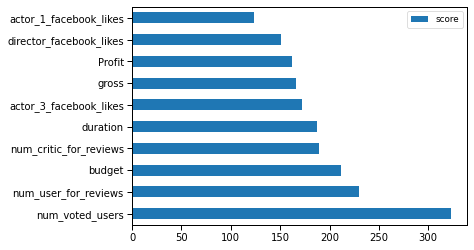

In [75]:
feature_important = xgb_model_cv.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False).head(10)
data.plot(kind='barh')


## 6. Inference and Further Steps <a id='6'></a>


<div class="alert alert-block alert-success">
    
1. As we can see from our model , XGBoost model is suffering from Overfitting With <b> Train R2 as 0.89 </b>  and <b> Test R2 as 0.58 </b>, it could further be improved by <b> hyperparameter tuning using Grid Search CV or by using other regularisation techniques like Ridge or lasso Regression </b>. Important parameters that affect the imdb_score are
    - num_voted_users
    - num_user_for_reviews
    - budget
    - num_critic_for_reviews
    - duration

    
2. Use all the variables provided so that we don't lose information, <b> then fit PCA </b> to reduce dimensions then apply various ML algorithms

    
3. We had dropped certain columns from our dataset like Director name,actor name etc, I think this features will affect the IMDB score by a big amount, Hence we can <b> take top 10 director and top 10 actors, actress and make a categorical variable against for each name </b> and rebuild the model. It could improve our R2 by some amount
    


4. We can also build a <b> classification model </b> rounding off rating to classes from 1 to 10
</div>



# Thank You
Aayush Gupta

+91 8209418783